Detected communities:
  Community 0: ['E2', 'E3', 'E1'] → Depts: {'ENG'}
  Community 1: ['M1', 'M2'] → Depts: {'MKT'}
  Community 2: ['O1', 'O2'] → Depts: {'OPS'}
  Community 3: ['H1'] → Depts: {'HR'}

Modularity (Q): 0.40
→ Strong community structure (good segmentation for brokerage opportunities)

Top Structural Holes (Ranked by Innovation Potential):
1. Between {'ENG'} and {'MKT'} → Combined value = 17.0
2. Between {'ENG'} and {'HR'} → Combined value = 11.0
3. Between {'MKT'} and {'OPS'} → Combined value = 11.0
4. Between {'MKT'} and {'HR'} → Combined value = 10.0
5. Between {'OPS'} and {'HR'} → Combined value = 5.0

🎯 RECOMMENDATION: Place bridge role between {'ENG'} and {'MKT'}!
   → This connects high-value, disconnected innovation domains.


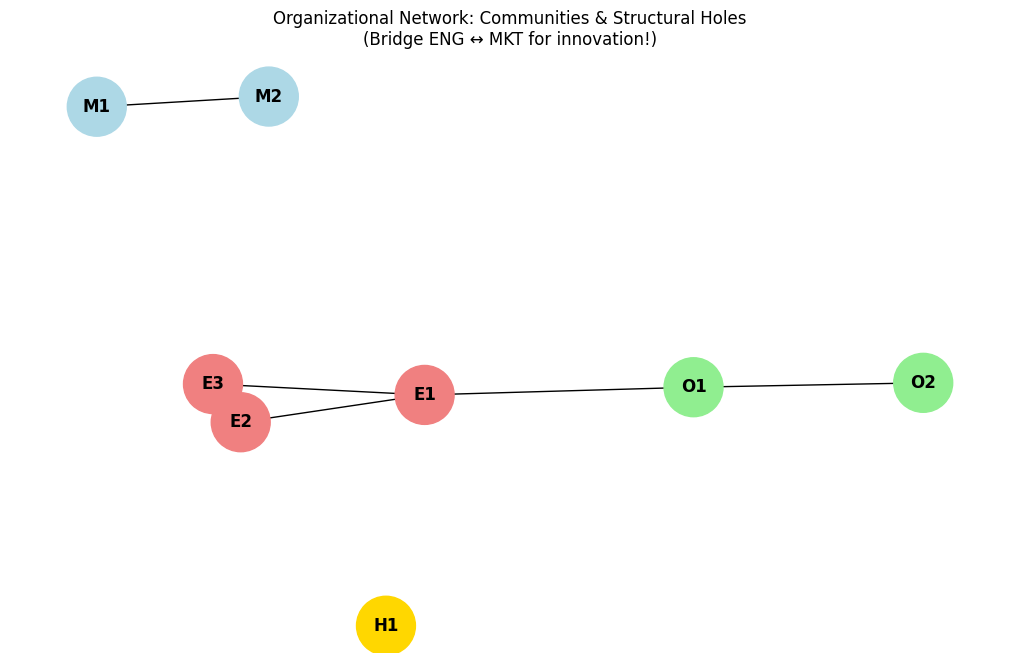

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# -------------------------------
# Simulate an Organization Network
# Communities: 
#   ENG = Engineering (R&D focus → high innovation value)
#   MKT = Marketing (Customer insights → high innovation value)
#   OPS = Operations (Execution focus → lower innovation value)
#   HR  = HR (Support function)
# -------------------------------
G = nx.Graph()

# Add nodes with labels indicating department (and innovation value)
nodes = [
    # Engineering (high-value for innovation)
    ('E1', {'dept': 'ENG', 'value': 9}),
    ('E2', {'dept': 'ENG', 'value': 9}),
    ('E3', {'dept': 'ENG', 'value': 9}),
    # Marketing (high-value: understands customers)
    ('M1', {'dept': 'MKT', 'value': 8}),
    ('M2', {'dept': 'MKT', 'value': 8}),
    # Operations (execution, not innovation-focused)
    ('O1', {'dept': 'OPS', 'value': 3}),
    ('O2', {'dept': 'OPS', 'value': 3}),
    # HR
    ('H1', {'dept': 'HR', 'value': 2}),
]

G.add_nodes_from(nodes)

# Add dense ties WITHIN departments (cohesion)
G.add_edges_from([
    # ENG triangle
    ('E1', 'E2'), ('E2', 'E3'), ('E3', 'E1'),
    # MKT dyad
    ('M1', 'M2'),
    # OPS dyad
    ('O1', 'O2')
    # HR is isolated (common in real orgs)
])

# NO ties between ENG and MKT → critical structural hole!
# (This is where innovation is blocked)

# Optional: Add a low-value bridge (e.g., ENG ↔ OPS)
G.add_edge('E1', 'O1')

# -------------------------------
# Step 1: Community Detection (using Louvain)
# -------------------------------
# Note: For small graphs, we can use greedy modularity
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)
print("Detected communities:")
for i, comm in enumerate(communities):
    depts = [G.nodes[n]['dept'] for n in comm]
    print(f"  Community {i}: {list(comm)} → Depts: {set(depts)}")

# Assign community ID to each node
node_to_comm = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = i

# -------------------------------
# Step 2: Compute Modularity (Q)
# -------------------------------
Q = community.modularity(G, communities)
print(f"\nModularity (Q): {Q:.2f}")
if Q > 0.3:
    print("→ Strong community structure (good segmentation for brokerage opportunities)")

# -------------------------------
# Step 3: Find Inter-Community Gaps & Value
# -------------------------------
# Map community to its avg innovation value
comm_value = {}
for i, comm in enumerate(communities):
    values = [G.nodes[n]['value'] for n in comm]
    comm_value[i] = sum(values) / len(values)

# Find all missing inter-community edges (potential holes)
missing_bridges = []
all_comms = list(range(len(communities)))

for i in all_comms:
    for j in all_comms:
        if i < j:
            # Check if ANY edge exists between comm i and j
            has_edge = False
            for u in communities[i]:
                for v in communities[j]:
                    if G.has_edge(u, v):
                        has_edge = True
                        break
                if has_edge:
                    break
            if not has_edge:
                # This is a structural hole between comm i and j
                combined_value = comm_value[i] + comm_value[j]
                missing_bridges.append({
                    'comm_i': i,
                    'comm_j': j,
                    'value_sum': combined_value,
                    'depts': (set(G.nodes[n]['dept'] for n in communities[i]),
                              set(G.nodes[n]['dept'] for n in communities[j]))
                })

# Sort by strategic value (highest sum = best innovation opportunity)
missing_bridges.sort(key=lambda x: x['value_sum'], reverse=True)

print("\nTop Structural Holes (Ranked by Innovation Potential):")
for rank, bridge in enumerate(missing_bridges, 1):
    depts_i, depts_j = bridge['depts']
    print(f"{rank}. Between {depts_i} and {depts_j} → Combined value = {bridge['value_sum']:.1f}")

# Recommend best bridge
if missing_bridges:
    best = missing_bridges[0]
    depts_i, depts_j = best['depts']
    print(f"\n🎯 RECOMMENDATION: Place bridge role between {depts_i} and {depts_j}!")
    print("   → This connects high-value, disconnected innovation domains.")

# -------------------------------
# Visualize
# -------------------------------
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Color by community
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']
node_colors = [colors[node_to_comm[n]] for n in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1800, font_weight='bold')
plt.title("Organizational Network: Communities & Structural Holes\n(Bridge ENG ↔ MKT for innovation!)")
plt.show()


=== Team 1: High Volume, Low Cohesion (Hub-Dependent) ===
Team size: 11 | Total collaborations (edges): 10
Average clustering coefficient: 0.00
Max k-core: 1
Largest clique size: 2
→ 🚨 LOW COHESION: Collaboration is hub-dependent (single point of failure).
→ ⚠️ No resilient core: No subgroup where everyone has ≥3 internal ties.
→ 🔗 Only dyads: No group-level trust or shared context.


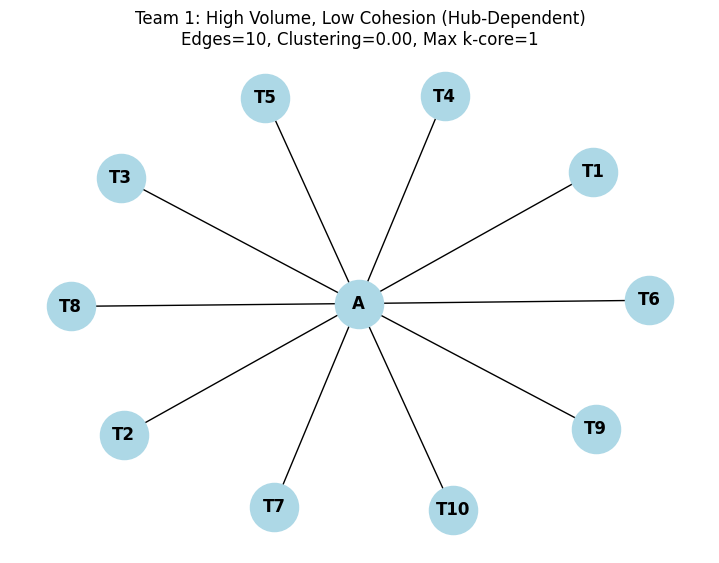


=== Team 2: Moderate Volume, High Cohesion (Resilient) ===
Team size: 6 | Total collaborations (edges): 10
Average clustering coefficient: 0.67
Max k-core: 3
Largest clique size: 3
→ ✅ HIGH COHESION: Team has redundant ties and group trust.
→ 💪 Strong core: Resilient subgroup can function without external input.
→ 👥 Group trust: Cliques enable shared norms and cooperation.


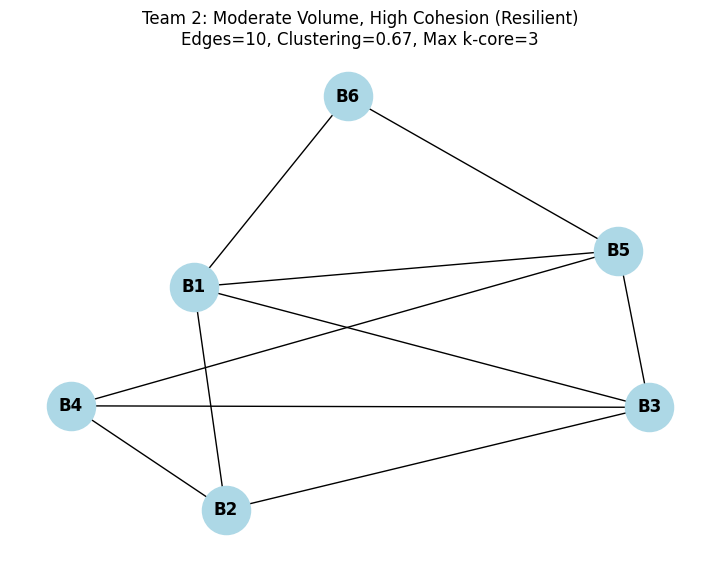

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------
# Scenario 1: HIGH VOLUME, LOW COHESION (Hub-Dependent)
# - Central manager (Hub) talks to everyone
# - Team members DO NOT talk to each other
# - High total interactions, but no closure
# -------------------------------
G_hub = nx.Graph()
# Hub (A) has 10 collaborators → high "volume"
hub_team = ['A'] + [f'T{i}' for i in range(1, 11)]  # A, T1, T2, ..., T10
G_hub.add_nodes_from(hub_team)

# A connects to all → 10 edges = high activity
for i in range(1, 11):
    G_hub.add_edge('A', f'T{i}')

# -------------------------------
# Scenario 2: MODERATE VOLUME, HIGH COHESION (Resilient Team)
# - 6 members, all collaborating in small groups
# - Many triangles → high closure
# - Total edges < Scenario 1, but dense internally
# -------------------------------
G_cohesive = nx.Graph()
cohesive_team = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']
G_cohesive.add_nodes_from(cohesive_team)

# Build a 6-node graph with high clustering (e.g., two overlapping triangles + extra ties)
edges_cohesive = [
    ('B1','B2'), ('B2','B3'), ('B3','B1'),  # Triangle 1
    ('B3','B4'), ('B4','B5'), ('B5','B3'),  # Triangle 2 (shares B3)
    ('B5','B6'), ('B6','B1'),                # Close the ring
    ('B2','B4'), ('B1','B5')                 # Add cross ties for density
]
G_cohesive.add_edges_from(edges_cohesive)

# -------------------------------
# Analysis Function
# -------------------------------
def analyze_team(G, name):
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    avg_clustering = nx.average_clustering(G)
    
    # k-core
    k_cores = nx.core_number(G)
    max_k = max(k_cores.values()) if k_cores else 0
    
    # Largest clique
    cliques = list(nx.find_cliques(G))
    max_clique = max((len(c) for c in cliques), default=0)
    
    # Diagnose
    print(f"\n=== {name} ===")
    print(f"Team size: {n_nodes} | Total collaborations (edges): {n_edges}")
    print(f"Average clustering coefficient: {avg_clustering:.2f}")
    print(f"Max k-core: {max_k}")
    print(f"Largest clique size: {max_clique}")
    
    # Interpretation logic (your rules)
    if avg_clustering < 0.2:
        print("→ 🚨 LOW COHESION: Collaboration is hub-dependent (single point of failure).")
    else:
        print("→ ✅ HIGH COHESION: Team has redundant ties and group trust.")
        
    if max_k <= 2:
        print("→ ⚠️ No resilient core: No subgroup where everyone has ≥3 internal ties.")
    else:
        print("→ 💪 Strong core: Resilient subgroup can function without external input.")
        
    if max_clique == 2:
        print("→ 🔗 Only dyads: No group-level trust or shared context.")
    elif max_clique >= 3:
        print("→ 👥 Group trust: Cliques enable shared norms and cooperation.")
    
    # Visualize
    plt.figure(figsize=(7, 5))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1200, font_weight='bold')
    plt.title(f"{name}\nEdges={n_edges}, Clustering={avg_clustering:.2f}, Max k-core={max_k}")
    plt.show()

# -------------------------------
# Run Analysis
# -------------------------------
analyze_team(G_hub, "Team 1: High Volume, Low Cohesion (Hub-Dependent)")
analyze_team(G_cohesive, "Team 2: Moderate Volume, High Cohesion (Resilient)")

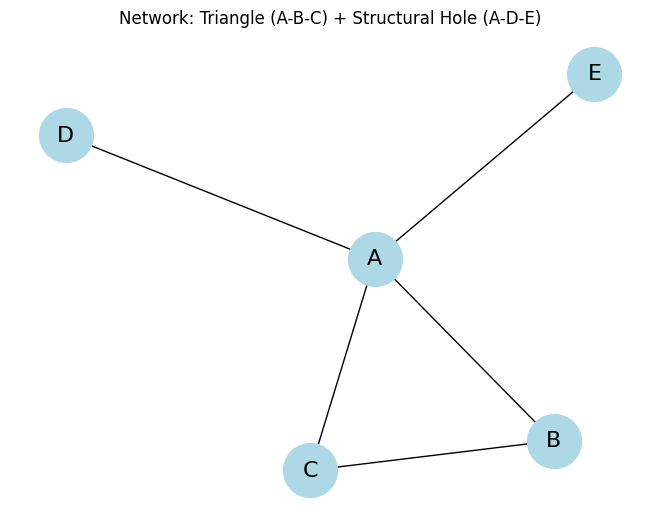

Closed triplets (triangles): [['A', 'B', 'C']]

Clustering coefficient (proxy for closure):
  A: 0.17
  B: 1.00
  C: 1.00
  D: 0.00
  E: 0.00

Structural hole indicators:
Node | Effective Size | Constraint (lower = more brokerage)
-------------------------------------------------------
  A  |        3.50    |          0.41
  B  |        1.00    |          0.95
  C  |        1.00    |          0.95
  D  |        1.00    |          1.00
  E  |        1.00    |          1.00


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed or undirected graph (undirected for simplicity)
G = nx.Graph()

# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Add edges
# - Triangle A-B-C: represents CLOSURE
# - A connected to D and E, but D-E not connected: A spans a STRUCTURAL HOLE
G.add_edges_from([
    ('A', 'B'), ('B', 'C'), ('C', 'A'),  # Closed triplet (triangle)
    ('A', 'D'), ('A', 'E')               # Open triplet: D and E not connected
    # Note: no edge between D and E → structural hole
])

# Visualize the network
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=16)
plt.title("Network: Triangle (A-B-C) + Structural Hole (A-D-E)")
plt.show()

# -------------------------------------------------
# 1. Detect CLOSED TRIPLETS (Closure)
# -------------------------------------------------
triangles = [cycle for cycle in nx.enumerate_all_cliques(G) if len(cycle) == 3]
print("Closed triplets (triangles):", triangles)

# Local clustering coefficient (higher = more closure around node)
clustering = nx.clustering(G)
print("\nClustering coefficient (proxy for closure):")
for node, coeff in clustering.items():
    print(f"  {node}: {coeff:.2f}")

# -------------------------------------------------
# 2. Detect STRUCTURAL HOLES (Brokerage)
# -------------------------------------------------
# Burt's "constraint" measure: lower = more brokerage
constraint = nx.constraint(G)
effective_size = nx.effective_size(G)

print("\nStructural hole indicators:")
print("Node | Effective Size | Constraint (lower = more brokerage)")
print("-" * 55)
for node in G.nodes():
    eff = effective_size.get(node, 0)
    con = constraint.get(node, 0)
    print(f"  {node}  |      {eff:6.2f}    |        {con:6.2f}")

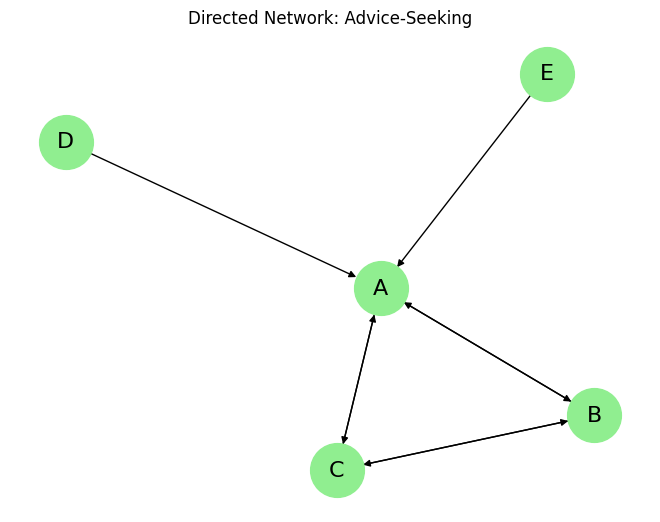

Directed 3-cycles (strong closure): [['B', 'A', 'C'], ['B', 'C', 'A']]

Reciprocated ties in A-B-C:
  A ↔ B: True
  B ↔ C: True
  C ↔ A: True

Ego: A
In-neighbors (seek advice from A): ['B', 'C', 'D', 'E']
  Are B and C connected? Yes
  Are B and D connected? No
  Are B and E connected? No
  Are C and D connected? No
  Are C and E connected? No
  Are D and E connected? No
  → A spans at least one structural hole (brokerage potential).

Ego: B
In-neighbors (seek advice from B): ['A', 'C']
  Are A and C connected? Yes
  → No structural hole among in-neighbors.


False

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph: edges = "seeks advice from"
G = nx.DiGraph()

# Nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Edges: X -> Y means "X seeks advice from Y"
G.add_edges_from([
    # Closed advice loop: A, B, C all seek advice from each other (strong closure)
    ('A', 'B'), ('B', 'A'),
    ('B', 'C'), ('C', 'B'),
    ('C', 'A'), ('A', 'C'),
    
    # A is sought for advice by D and E
    ('D', 'A'),  # D seeks advice from A
    ('E', 'A'),  # E seeks advice from A
    
    # But D and E do NOT seek advice from each other → structural hole
    # (no edge D->E or E->D)
])

# Visualize
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=16, arrows=True)
plt.title("Directed Network: Advice-Seeking")
plt.show()

# -------------------------------------------------
# 1. Observe CLOSURE in directed network
# -------------------------------------------------
# In directed graphs, "closure" often means a **reciprocated triangle** (3-cycle or fully mutual)
# Let's find 3-cycles (A->B->C->A)
cycles = list(nx.simple_cycles(G))
tri_cycles = [c for c in cycles if len(c) == 3]
print("Directed 3-cycles (strong closure):", tri_cycles)

# Also check reciprocity within A-B-C
print("\nReciprocated ties in A-B-C:")
for u, v in [('A','B'), ('B','C'), ('C','A')]:
    rec = G.has_edge(v, u)
    print(f"  {u} ↔ {v}: {G.has_edge(u,v) and rec}")

# -------------------------------------------------
# 2. Observe STRUCTURAL HOLE: Is A a broker?
# -------------------------------------------------
# In directed networks, brokerage is often about **controlling incoming/outgoing info**
# We'll examine A's *ego network* (people who seek A + who A seeks)

def analyze_ego_brokerage(G, ego):
    """
    Analyze if ego spans structural holes in a directed graph.
    Focus: People who send ties TO ego (advice-seekers) – are they connected?
    """
    # In-neighbors: people who seek advice FROM ego (ego is their source)
    in_neighbors = list(G.predecessors(ego))  # D, E → they point to A
    
    print(f"\nEgo: {ego}")
    print(f"In-neighbors (seek advice from {ego}): {in_neighbors}")
    
    # Check if in-neighbors are connected to each other (in either direction)
    hole_exists = False
    for i in range(len(in_neighbors)):
        for j in range(i+1, len(in_neighbors)):
            u, v = in_neighbors[i], in_neighbors[j]
            connected = G.has_edge(u, v) or G.has_edge(v, u)
            print(f"  Are {u} and {v} connected? {'Yes' if connected else 'No'}")
            if not connected:
                hole_exists = True
    
    if hole_exists:
        print(f"  → {ego} spans at least one structural hole (brokerage potential).")
    else:
        print(f"  → No structural hole among in-neighbors.")
    
    return hole_exists

# Analyze A
analyze_ego_brokerage(G, 'A')

# For comparison, analyze B (in closed triad)
analyze_ego_brokerage(G, 'B')

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted graph: higher weight = stronger tie
G = nx.Graph()

# Add weighted edges: (u, v, {'weight': strength})
# Let's say weight = 1 (weak), 3 (strong)
G.add_edges_from([
    ('Alice', 'Bob', {'weight': 3}),      # strong tie
    ('Alice', 'Charlie', {'weight': 3}),  # strong tie
    ('Bob', 'Charlie', {'weight': 3}),    # triangle = closure
    
    ('Alice', 'David', {'weight': 1}),    # weak tie
    ('Alice', 'Eve', {'weight': 1}),      # weak tie
    
    # David and Eve are in different clusters (no edge)
])

# Define weak vs. strong threshold
THRESHOLD = 2  # weight < 2 → weak tie

# Identify weak ties from Alice
alice_neighbors = G['Alice']
weak_ties = [nbr for nbr in alice_neighbors 
             if G['Alice'][nbr]['weight'] < THRESHOLD]

print("Alice's weak ties:", weak_ties)  # → ['David', 'Eve']

# Now check: do David and Eve belong to different clusters?
# (This simulates "bridging")
if not G.has_edge('David', 'Eve'):
    print("→ Alice's weak ties bridge disconnected groups: potential opportunity access!")

Alice's weak ties: ['David', 'Eve']
→ Alice's weak ties bridge disconnected groups: potential opportunity access!


=== Network Summary (100 Users) ===
Number of nodes: 100
Number of edges: 600
Density: 0.0606
Reciprocity: 1.0000
Transitivity (global clustering): 0.4297
Average Clustering Coefficient: 0.4430
Number of bridges (tie-level): 0
Estimated weak tie candidates: 35
Potential brokers (low structural constraint): 20


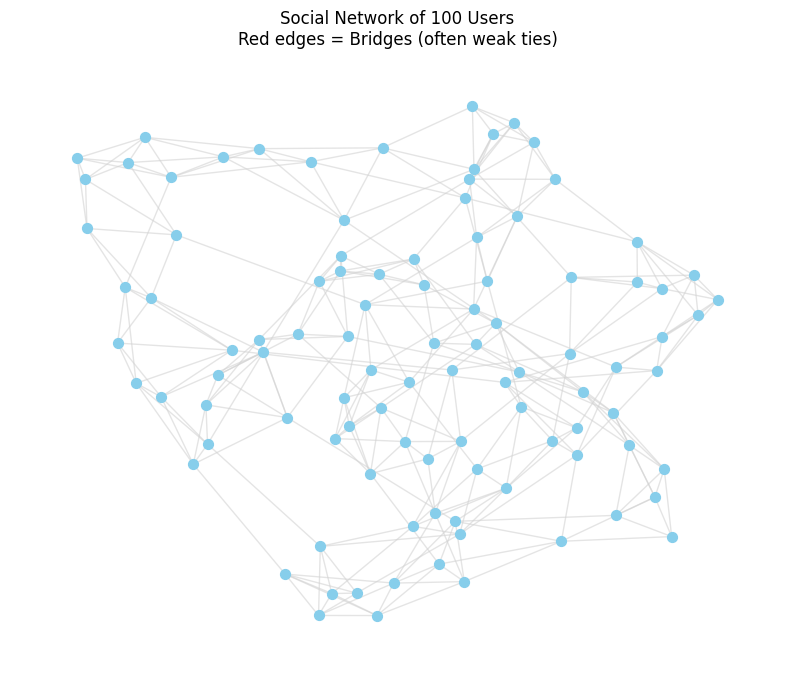

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

'''
We’ll use the Watts–Strogatz small-world model, 
which captures both local clustering (like real social networks) 
and short path lengths—ideal for illustrating weak ties and bridges.
'''
# Create a small-world network with 100 nodes
G = nx.watts_strogatz_graph(n=100, k=6, p=0.1, seed=42)
# Convert to directed graph to analyze reciprocity and directionality
G = G.to_directed()

# --- Dyad-level ---
num_dyads = 100 * 99  # possible directed dyads
num_edges = G.number_of_edges()
density = nx.density(G)
reciprocity = nx.reciprocity(G)  # fraction of mutual dyads

# --- Triad-level ---
transitivity = nx.transitivity(G)  # global clustering (triadic closure)
avg_clustering = nx.average_clustering(G.to_undirected())

# --- Structural holes & bridges ---
# Approximate structural holes via betweenness centrality or local constraint
constraint = nx.constraint(G.to_undirected())
# Nodes with low constraint = brokers over structural holes
brokers = [node for node, c in constraint.items() if c < np.percentile(list(constraint.values()), 20)]

# Find bridges (edges whose removal increases # components)
# Only works on undirected graphs
undir_G = G.to_undirected()
bridges = list(nx.bridges(undir_G))

# Weak ties: assume weaker ties = lower frequency → simulate via edge weight
# For demo, treat edges NOT in triangles as "weak ties" (approximation)
triangles = nx.triangles(undir_G)
weak_tie_candidates = []
for u, v in undir_G.edges():
    # If u and v share no common neighbors, likely a weak tie
    if len(set(undir_G.neighbors(u)) & set(undir_G.neighbors(v))) == 0:
        weak_tie_candidates.append((u, v))
        
print("=== Network Summary (100 Users) ===")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Density: {density:.4f}")
print(f"Reciprocity: {reciprocity:.4f}")
print(f"Transitivity (global clustering): {transitivity:.4f}")
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
print(f"Number of bridges (tie-level): {len(bridges)}")
print(f"Estimated weak tie candidates: {len(weak_tie_candidates)}")
print(f"Potential brokers (low structural constraint): {len(brokers)}")        

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(undir_G, seed=42)

# Draw all edges in light gray
nx.draw_networkx_edges(undir_G, pos, edge_color='lightgray', alpha=0.6)

# Highlight bridges in red
nx.draw_networkx_edges(undir_G, pos, edgelist=bridges, edge_color='red', width=2)

# Draw nodes
nx.draw_networkx_nodes(undir_G, pos, node_size=50, node_color='skyblue')

plt.title("Social Network of 100 Users\nRed edges = Bridges (often weak ties)")
plt.axis('off')
plt.show()

Giant component size: 100 / 100
Largest clique size: 4
Nodes in 3-core: 100
Defaulting to user installation because normal site-packages is not writeable
Number of communities: 8
Modularity (Q): 0.665
Homophily in edges: 0.513 (baseline: 0.580)



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


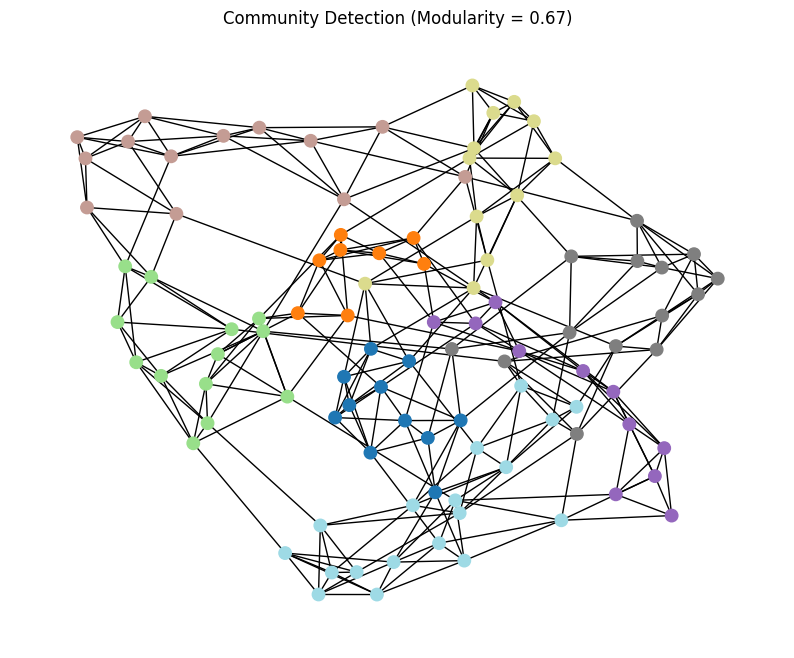

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. RECREATE NETWORK (same as before)
G = nx.watts_strogatz_graph(n=100, k=6, p=0.1, seed=42)
G = G.to_undirected()  # Community detection usually undirected

# Optional: Assign a node attribute (e.g., "risk_propensity") for homophily
np.random.seed(42)
risk = np.random.choice(['high', 'low'], size=100, p=[0.3, 0.7])
nx.set_node_attributes(G, dict(enumerate(risk)), 'risk')

# 2. GIANT COMPONENT
components = list(nx.connected_components(G))
giant = G.subgraph(max(components, key=len))
print(f"Giant component size: {len(giant)} / {G.number_of_nodes()}")

# 3. CLIQUES (find max cliques — may be slow; limit size)
cliques = list(nx.find_cliques(G))
max_clique_size = max(len(c) for c in cliques)
print(f"Largest clique size: {max_clique_size}")

# 4. K-CORES
core_numbers = nx.core_number(G)
kcore_3 = nx.k_core(G, k=3)
print(f"Nodes in 3-core: {len(kcore_3)}")

# 5. COMMUNITY DETECTION (Louvain via python-louvain)
!pip install python-louvain  # Run if needed
import community as community_louvain

partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Number of communities: {len(set(partition.values()))}")
print(f"Modularity (Q): {modularity:.3f}")

# 6. HOMOPHILY (on 'risk' attribute)
def homophily_ratio(G, attr_name):
    same = 0
    total = 0
    for u, v in G.edges():
        if G.nodes[u][attr_name] == G.nodes[v][attr_name]:
            same += 1
        total += 1
    return same / total if total > 0 else 0

homo = homophily_ratio(G, 'risk')
baseline = (0.3**2 + 0.7**2)  # expected by chance
print(f"Homophily in edges: {homo:.3f} (baseline: {baseline:.3f})")

# Map partition to colors
colors = [partition[node] for node in G.nodes()]
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(
    G, pos,
    node_color=colors,
    cmap=plt.cm.tab20,
    node_size=80,
    with_labels=False
)
plt.title(f"Community Detection (Modularity = {modularity:.2f})")
plt.axis('off')
plt.show()

Nodes: 100, Edges: 290

=== OVERREPRESENTATION ANALYSIS ===
Overall high-risk proportion: 34.00%

→ BRIDGE NODES (potential brokers):
  Nodes: 3
  High-risk: 3 (100.00%)
  Overrepresented? No (p = 0.067)

→ K-CORE NODES (k≥3, cohesive core):
  Nodes: 92
  High-risk: 27 (29.35%)
  Overrepresented? No (p = 0.003)


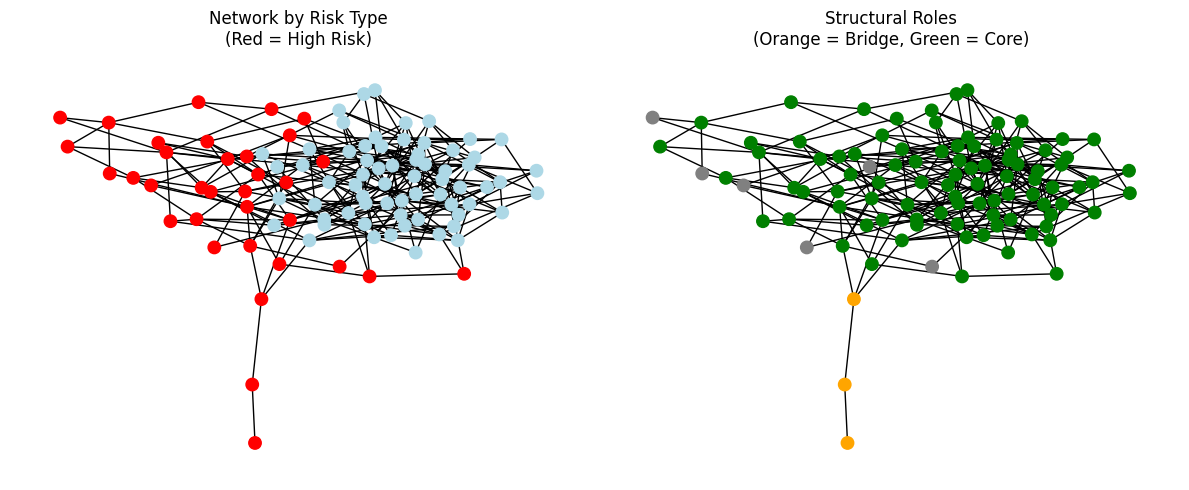

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ----------------------------
# 1. GENERATE NETWORK WITH HOMOPHILY ON RISK
# ----------------------------
np.random.seed(42)
n = 100
# Assign risk type: 30% high-risk, 70% low-risk
risk_types = np.random.choice(['high', 'low'], size=n, p=[0.3, 0.7])

# Create empty graph
G = nx.Graph()
G.add_nodes_from(range(n))
nx.set_node_attributes(G, {i: risk_types[i] for i in range(n)}, 'risk')

# Add edges with homophily: higher probability within same risk group
p_within = 0.08   # connection prob within group
p_between = 0.02  # connection prob across groups

for i in range(n):
    for j in range(i + 1, n):
        same_group = (risk_types[i] == risk_types[j])
        prob = p_within if same_group else p_between
        if np.random.rand() < prob:
            G.add_edge(i, j)

# Ensure graph is not too sparse
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# ----------------------------
# 2. IDENTIFY STRUCTURAL ROLES
# ----------------------------

# A. BRIDGES (edges whose removal disconnects the graph)
# Only defined on connected components; use giant component if needed
if not nx.is_connected(G):
    giant_nodes = max(nx.connected_components(G), key=len)
    G_giant = G.subgraph(giant_nodes).copy()
else:
    G_giant = G.copy()

# Recompute risk attributes for giant component
risk_giant = nx.get_node_attributes(G_giant, 'risk')

# Find bridges
bridge_edges = list(nx.bridges(G_giant))
# Nodes incident to bridges = potential brokers
bridge_nodes = set()
for u, v in bridge_edges:
    bridge_nodes.add(u)
    bridge_nodes.add(v)

# B. K-CORE (core = high cohesion; use k=3 as example)
core_number = nx.core_number(G_giant)
k = 3
core_nodes = {node for node, k_val in core_number.items() if k_val >= k}

# ----------------------------
# 3. TEST OVERREPRESENTATION
# ----------------------------

def overrepresentation_test(G, target_nodes, attr_name, target_attr_value):
    total = G.number_of_nodes()
    target_total = len(target_nodes)
    
    # Count how many in target group have the attribute
    target_with_attr = sum(1 for node in target_nodes if G.nodes[node][attr_name] == target_attr_value)
    total_with_attr = sum(1 for node in G.nodes if G.nodes[node][attr_name] == target_attr_value)
    
    # Contingency table: [ [in_role & high_risk, in_role & not], [not_in_role & high_risk, ...] ]
    a = target_with_attr
    b = target_total - a
    c = total_with_attr - a
    d = (total - target_total) - c
    
    table = [[a, b], [c, d]]
    chi2, p, dof, expected = chi2_contingency(table)
    
    prop_in_role = a / target_total if target_total > 0 else 0
    prop_overall = total_with_attr / total
    
    return {
        'count_in_role': target_total,
        'high_risk_in_role': a,
        'proportion_in_role': prop_in_role,
        'proportion_overall': prop_overall,
        'chi2': chi2,
        'p_value': p,
        'overrepresented': prop_in_role > prop_overall and p < 0.05
    }

# Test for bridges
bridge_result = overrepresentation_test(G_giant, bridge_nodes, 'risk', 'high')

# Test for k-core
core_result = overrepresentation_test(G_giant, core_nodes, 'risk', 'high')

# ----------------------------
# 4. PRINT RESULTS
# ----------------------------

print("\n=== OVERREPRESENTATION ANALYSIS ===")
print(f"Overall high-risk proportion: {bridge_result['proportion_overall']:.2%}")

print("\n→ BRIDGE NODES (potential brokers):")
print(f"  Nodes: {bridge_result['count_in_role']}")
print(f"  High-risk: {bridge_result['high_risk_in_role']} ({bridge_result['proportion_in_role']:.2%})")
print(f"  Overrepresented? {'Yes' if bridge_result['overrepresented'] else 'No'} (p = {bridge_result['p_value']:.3f})")

print("\n→ K-CORE NODES (k≥3, cohesive core):")
print(f"  Nodes: {core_result['count_in_role']}")
print(f"  High-risk: {core_result['high_risk_in_role']} ({core_result['proportion_in_role']:.2%})")
print(f"  Overrepresented? {'Yes' if core_result['overrepresented'] else 'No'} (p = {core_result['p_value']:.3f})")

# ----------------------------
# 5. VISUALIZE (color by risk + highlight bridges)
# ----------------------------

plt.figure(figsize=(12, 5))

# Layout
pos = nx.spring_layout(G_giant, seed=42)

# Subplot 1: Risk type
plt.subplot(1, 2, 1)
risk_color = ['red' if risk_giant[node] == 'high' else 'lightblue' for node in G_giant.nodes()]
nx.draw(G_giant, pos, node_color=risk_color, node_size=80, with_labels=False)
plt.title("Network by Risk Type\n(Red = High Risk)")

# Subplot 2: Highlight bridge nodes
plt.subplot(1, 2, 2)
node_colors = []
for node in G_giant.nodes():
    if node in bridge_nodes:
        node_colors.append('orange')
    elif node in core_nodes:
        node_colors.append('green')
    else:
        node_colors.append('gray')
nx.draw(G_giant, pos, node_color=node_colors, node_size=80, with_labels=False)
plt.title("Structural Roles\n(Orange = Bridge, Green = Core)")

plt.tight_layout()
plt.show()